# Bellcore data transference analisys

* Caio Everest - caioeverest@edu.unirio.br
* Cesar - cesar@edu.unirio.br

## imports

In [108]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import poisson

## read file and set columns identifiers

In [109]:
path_file = 'bellcore_data.csv'
df = pd.read_csv(path_file,header=None)
df.columns = ['Time', 'PackageSize']
df.describe()

,Time,PackageSize
count,13107.000000,13107.000000
mean,21.046862,657.022889
std,11.043100,586.662403
min,0.017716,64.000000
25%,11.290324,133.000000
50%,23.519164,174.000000
75%,30.037934,1090.000000
max,38.706900,1518.000000


## Package size

In [110]:
dn_num_pkg_mean = df['PackageSize'].mean()
dn_num_pkg_std = df['PackageSize'].std()
df_mediam = df['PackageSize'].median()

### Plot histogram of PackageSize

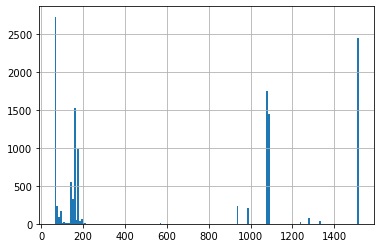

In [111]:
hist = df['PackageSize'].hist(bins = int(df_mediam))

## Time

In [112]:
dn_time_trace = np.array(df['Time'])

### Creating normal distribution function.

In [118]:
def normal_dist(x , dn_num_pkg_mean, dn_num_pkg_std):
    prob_density = (np.pi*dn_num_pkg_std) * np.exp(-0.5*((x-dn_num_pkg_mean)/dn_num_pkg_std)**2)
    return prob_density

### Apply function to the data.

In [114]:
pdf = normal_dist(dn_time_trace,mean,sd)

### Plotting the Results

Text(0, 0.5, 'Probability Density')

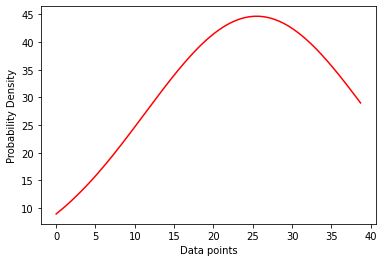

In [119]:
plt.plot(dn_time_trace,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

## Apply poisson comp

Text(0, 0.5, 'P(X=k)')

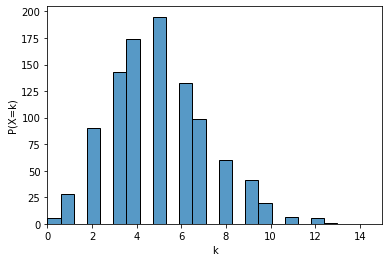

In [116]:
dados_poisson = poisson.rvs(mu=5, size=1000)
sns.histplot(dados_poisson)
plt.xlim([0,15])
plt.xlabel('k')
plt.ylabel('P(X=k)')